# Probability Theory and the Sample Space Analysis

Few things in life are certain; most things are driven by chance. Whenever we cheer for our favorite sports team, or purchase a lottery ticket, or make an investment in the stock market, we hope for some particular outcome, but that outcome cannot ever be guaranteed. Randomness permeates our day-to-day experiences. Fortunately, that randomness can still be mitigated and controlled. We know that some unpredictable events occur more rarely than others and that certain decisions carry less uncertainty than other much-riskier choices. Driving to work in a car is safer than riding a motorcycle. Investing part of your savings in a retirement account is safer than betting it all on a single hand of blackjack. We can intrinsically sense these trade-offs in certainty because even the most unpredictable systems still show some predictable behaviors. These behaviors have been rigorously studied using *probability theory*. Probability theory is an inherently complex branch of math. However, aspects of the theory can be understood without knowing the mathematical underpinnings. In fact, difficult probability problems can be solved in Python without needing to know a single math equation. Such an equation-free approach to probability requires a baseline understanding of what mathematicians call a *sample space*.

Certain actions have measurable outcomes. A *sample space* is the set of all the possible outcomes an action could produce. Let’s take the simple action of flipping a coin. The coin will land on either heads or tails. Thus, the coin flip will produce one of two measurable outcomes: *heads* or *tails*. By storing these outcomes in a Python set, we can create a sample space of coin flips.

## Unbiased Coin

In [ ]:
sample_space = {'Heads', 'Tails'}

In [ ]:
probability_heads = 1 / len(sample_space)
print(f"Probability of choosing heads is {probability_heads}")

Probability of choosing heads is 0.5


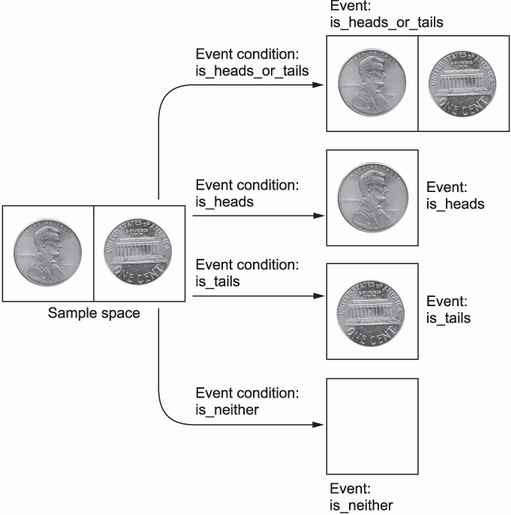

*figure: Four event conditions applied to a sample space. The sample space contains two outcomes: heads and tails. Arrows represent the event conditions. Every event condition is a yes-or-no function. Each function filters out those outcomes that do not satisfy its terms. The remaining outcomes form an event. Each event contains a subset of the outcomes found in the sample space. Four events are possible: heads, tails, heads or tails, and neither heads nor tails.*

In [ ]:
def is_heads_or_tails(outcome): return outcome in sample_space
def is_neither(outcome): return not is_heads_or_tails(outcome)
def is_heads(outcome): return outcome == "Heads"
def is_tails(outcome): return outcome == "Tails"

In [ ]:
def get_event(event_condition, sample_space):
  return set([outcome for outcome in sample_space if event_condition(outcome)])

In [ ]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [ ]:
def compute_probability(event_condition, sample_space):
  event = get_event(event_condition, sample_space)
  return len(event) / len(sample_space)

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    probability = compute_probability(event_condition, sample_space)
    print(f'Probability: {probability}\n')

Event Condition: is_heads_or_tails
Probability: 1.0

Event Condition: is_heads
Probability: 0.5

Event Condition: is_tails
Probability: 0.5

Event Condition: is_neither
Probability: 0.0



## Biased Coin

In [ ]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

In [ ]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [ ]:
# Checking the weighted event size

event = get_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [ ]:
def compute_event_probability(event_condition, generic_sample_space):
  event = get_event(event_condition, generic_sample_space)
  if type(generic_sample_space) == type(set()):
    return len(event) / len(generic_sample_space)
  event_size = sum(generic_sample_space[outcome] for outcome in event)
  return event_size / sum(generic_sample_space.values())

In [ ]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## Analyzing a family with four children

Suppose a family has four children. What is the probability that exactly two of the children are boys? We’ll assume that each child is equally likely to be either a boy or a girl. Thus we can construct an unweighted sample space where each outcome represents one possible sequence of four children, as shown in figure below:

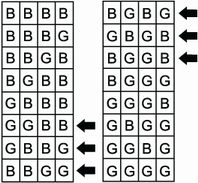

*fgiure: The sample space for four sibling children. Each row in the sample space contains 1 of 16 possible outcomes. Every outcome represents a unique combination of four children. The sex of each child is indicated by a letter: B for boy and G for girl. Outcomes with two boys are marked by an arrow. There are six such arrows; thus, the probability of two boys equals 6 / 16.*

In [ ]:
from itertools import product

possible_children = ['Boy', 'Girl']

# Naive approach
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

# Better approach
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space

# Best approach
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

In [ ]:
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [ ]:
def has_two_boys(outcome): 
  num = len([child for child in outcome if child == 'Boy']) == 2
  return num

prob = compute_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys: {prob}")

Probability of 2 boys: 0.375


## Analyzing multiple die rolls

Suppose we’re shown a fair six-sided dice whose faces are numbered from 1 to 6. The die is rolled six times. What is the probability that these six die rolls add up to 21?

We begin by defining the possible values of any single roll. These are integers that range from 1 to 6.

In [ ]:
numbers_on_die = list(range(1,7))

sample_space_die = set(product(numbers_on_die, repeat=6))

In [ ]:
def add_up_to_21(outcome):
  return sum(outcome) == 21

prob = compute_event_probability(add_up_to_21, sample_space_die)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850


In [ ]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space_die)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850


## Computing die-roll probabilities using weighted sample spaces

We’ve just computed the likelihood of six die rolls summing to 21. Now, let’s recompute that probability using a weighted sample space. We need to convert our unweighted sample space set into a weighted sample space dictionary; this will require us to identify all possible die-roll sums. Then we must count the number of times each sum appears across all possible die-roll combinations. These combinations are already stored in our computed sample_space set. By mapping the die-roll sums to their occurrence counts, we will produce a weighted_sample_space result.

In [ ]:
from collections import defaultdict

weighted_sample_space = defaultdict(int)

for outcome in sample_space_die:
  total = sum(outcome)
  weighted_sample_space[total] += 1

weighted_sample_space

defaultdict(int,
            {6: 1,
             7: 6,
             8: 21,
             9: 56,
             10: 126,
             11: 252,
             12: 456,
             13: 756,
             14: 1161,
             15: 1666,
             16: 2247,
             17: 2856,
             18: 3431,
             19: 3906,
             20: 4221,
             21: 4332,
             22: 4221,
             23: 3906,
             24: 3431,
             25: 2856,
             26: 2247,
             27: 1666,
             28: 1161,
             29: 756,
             30: 456,
             31: 252,
             32: 126,
             33: 56,
             34: 21,
             35: 6,
             36: 1})

In [ ]:
num_combinations = weighted_sample_space.get(21)
print(f"There are {num_combinations } ways for six rolled dice to sum to 21")

prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space_die))

print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

There are 4332 ways for six rolled dice to sum to 21
Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850
Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


## Computing probabilities over interval ranges

So far, we’ve only analyzed event conditions that satisfy some single value. Now we’ll analyze event conditions that span intervals of values. An interval is the set of all the numbers between and including two boundary cutoffs. Let’s define an is_in_interval function that checks whether a number falls within a specified interval. We’ll control the interval boundaries by passing a minimum and a maximum parameter.

In [ ]:
def is_in_interval(number, minimum, maximum):
  return minimum <= number <= maximum
  
prob = compute_event_probability(lambda x: is_in_interval(x, 10,21), weighted_sample_space)
print(f"Probability of the interval: {prob:2f}")

Probability of the interval: 0.544624


Interval analysis is critical to solving a whole class of very important problems in probability and statistics. One such problem involves the evaluation of extremes, the problem boils down to whether obeserved data is too extreme to be believable. Data seems extreme when it is too unusual to have occurred by random chance. For instance, suppose we observe 10 flips of an allegedly fair coin, and that coin lands on heads 8 out of 10 times. Now, we had expected the coin to hit tails half the time, not 20% of the time, so the observations seem a little strange. Is the coin actually fair? Or has it been secretly replaced with a trick coin that falls on heads a majority of the time? We’ll try to find out by asking the following question: what is the probability that 10 fair coin-flips lead to an extreme number of heads? We’ll define an extreme head-count as observing of 8 heads or more. Thus, we can describe the problem as follows: what is the probability that 10 fair coin-flips produce between 8 and 10 heads?

In [ ]:
coin_sides = ['Heads', 'Tails']

In [ ]:
from pprint import pprint

def generate_coin_sample_space(num_flips):
  weighted_sample_space_coins = defaultdict(int)
  combinations = set(product(coin_sides, repeat=num_flips))
  for combination in combinations:
    num_heads = len([combo for combo in combination if combo == "Heads"])
    weighted_sample_space_coins[num_heads] += 1
  return weighted_sample_space_coins
  
weighted_sample_space_coins = generate_coin_sample_space(10)
pprint(weighted_sample_space_coins)

defaultdict(<class 'int'>,
            {0: 1,
             1: 10,
             2: 45,
             3: 120,
             4: 210,
             5: 252,
             6: 210,
             7: 120,
             8: 45,
             9: 10,
             10: 1})


In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8,10), weighted_sample_space_coins)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


Our observed head-count does not commonly occur. Does this mean the coin is biased? Not necessarily. Observing 8 out of 10 tails is as extreme as observing 8 out of 10 heads. Had we observed 8 tails and not 8 heads, we would still be suspicious of the coin. Our computed interval did not take this tails-driven extreme into account. Instead, we treated 8 or more tails as just another normal possibility. If we truly wish to measure the fairness of our coin, we’ll need to update our interval computations. We’ll need to include the likelihood of observing 8 or more tails. This is equivalent to observing 2 heads or less. Let's formulate the problem as follows; what is the probability that 10 fair coin-flips produce either 0 to 2 heads or 8 to 10 heads? Or, stated more concisely, what is the probability that the coin-flips do NOT produce between 3 and 7 heads?

In [ ]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space_coins)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


In [ ]:
weighted_sample_space_20_flips = generate_coin_sample_space(20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


The updated probability has dropped from approximately .1 to approximately .01. Thus, the added evidence has caused a 10-fold decrease in our confidence of fairness.

Despite this probability drop, the ratio of heads to tails has remained constant at 4-to-1. Both our original and updated experiments produced 80% heads and 20% tails. This leads to an interesting question: why does the probability of observing 80% or more heads decrease as the supposedly fair coin gets flipped more times?

We can find out through detailed mathematical analysis. However, a much more intuitive solution is to just visualize the distribution of head-counts across our 2 sample space dictionaries. The visualization would effectively be a plot of keys (head-counts) vs values (combination counts) present in each dictionary.

## Plotting coin-flip probabilities

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

We now have tools to visualize the relationship between a coin-flip count and the probability of heads. In section 1, we examined the probability of seeing 80% or more heads across a series of coin flips. That probability decreased as the coin-flip count went up, and we wanted to know why. We’ll soon find out by plotting head counts versus their associated coin-flip combination counts. These values were already computed in our section 1 analysis. The keys in the weighted_sample_space dictionary contain all possible head counts across 10 flipped coins. These head counts map to combination counts. Meanwhile, the weighted_sample_space_20_flips dictionary contains the head-count mappings for 20 flipped coins.

Our aim is to compare the plotted data from both these dictionaries. We begin by plotting the elements of weighted_sample_space: we plot its keys on the x-axis versus the associated values on the y-axis. The x-axis corresponds to 'Head-count', and the y-axis corresponds to 'Number of coin-flip combinations with x heads'. We use a scatter plot to visualize key-to-value relationships directly without connecting any plotted points.

In [ ]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
weighted_sample_space

defaultdict(int,
            {0: 1,
             1: 10,
             2: 45,
             3: 120,
             4: 210,
             5: 252,
             6: 210,
             7: 120,
             8: 45,
             9: 10,
             10: 1})

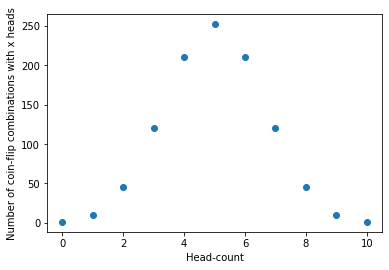

In [ ]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

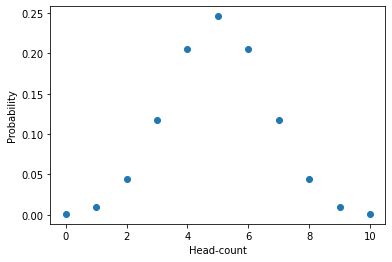

In [ ]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [ ]:
assert sum(prob_x_10_flips) == 1.0

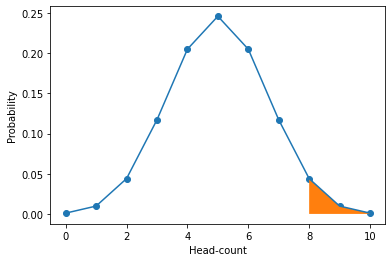

In [ ]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

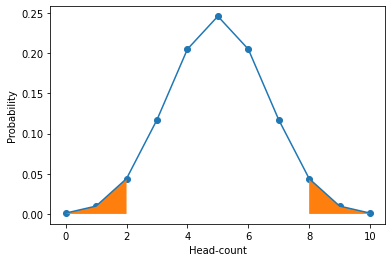

In [ ]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [ ]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
weighted_sample_space_20_flips

defaultdict(int,
            {0: 1,
             1: 20,
             2: 190,
             3: 1140,
             4: 4845,
             5: 15504,
             6: 38760,
             7: 77520,
             8: 125970,
             9: 167960,
             10: 184756,
             11: 167960,
             12: 125970,
             13: 77520,
             14: 38760,
             15: 15504,
             16: 4845,
             17: 1140,
             18: 190,
             19: 20,
             20: 1})

In [ ]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

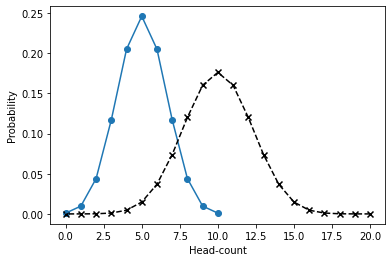

In [ ]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

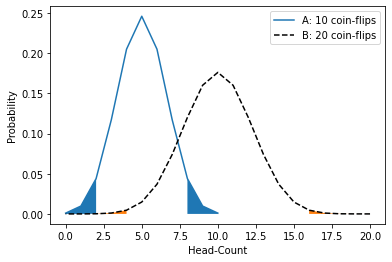

In [ ]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle='--',
         label='B: 20 coin-flips')
plt.legend()

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.show()

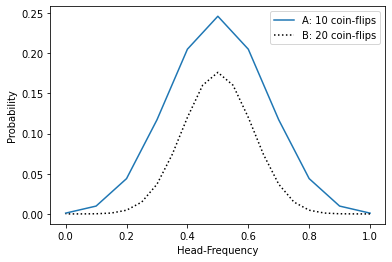

In [ ]:
x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')
plt.legend()

plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

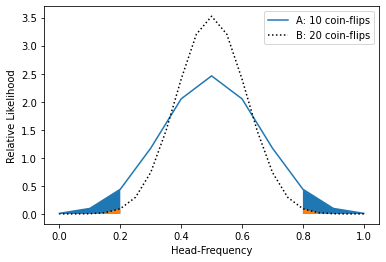

In [ ]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k',
         linestyle=':', label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

## Simulating random coin flips and dice rolls using NumPy

In [ ]:
import numpy as np

In [ ]:
dice_roll = np.random.randint(1, 7)
assert 1 <= dice_roll <= 6
dice_roll

1

In [ ]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [ ]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = sum(coin_flip_sequence)
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


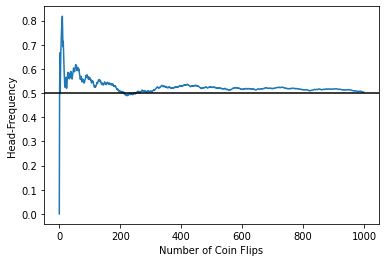

In [ ]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

In [ ]:
np.random.seed(0)
print("Lets flip the biased coin once.")
coin_flip = np.random.binomial(1, .7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLets flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
       f"{number_coin_flips} biased coin flips"))

Lets flip the biased coin once.
Biased coin landed on heads.

Lets flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [ ]:
np.random.seed(0)
head_count = np.random.binomial(1000, .7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [ ]:
np.random.seed(0)
for i in range(1, 6):
    head_count = np.random.binomial(1000, .7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.697
Frequency at iteration 2 is 0.69
Frequency at iteration 3 is 0.7
Frequency equals the probability!

Frequency at iteration 4 is 0.707
Frequency at iteration 5 is 0.702


## Computing confidence intervals using histograms and NumPy arrays

Suppose we’re handed a biased coin whose bias we don’t know. We flip the coin 1,000 times and observe a frequency of 0.709. We know the frequency approximates the actual probability, but by how much? More precisely, what are the chances of the actual probability falling within an interval close to 0.709 (such as an interval between 0.7 and 0.71)? To find out, we must do additional sampling.

We’ve previously sampled our coin over five iterations of 1,000 coin flips each. The sampling produced some fluctuations in the frequency. Let’s explore these fluctuations by increasing our frequency count from 5 to 500. We can execute this supplementary sampling by running [np.random.binomial(1000, 0.7) for _ in range(500)].

In [ ]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, .7) for _ in range(500)]
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [ ]:
assert head_count_array.tolist() == head_count_list
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True
head_count_list[0:10]

[697, 690, 700, 707, 702, 699, 723, 670, 702, 713]

In [ ]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
                                        head_count_list))
print(frequency_array[:10])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713]


In [ ]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


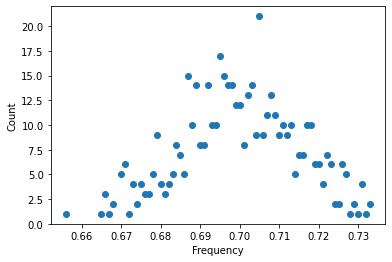

In [ ]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

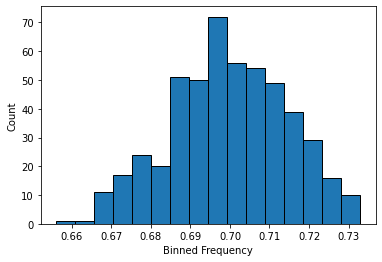

In [ ]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


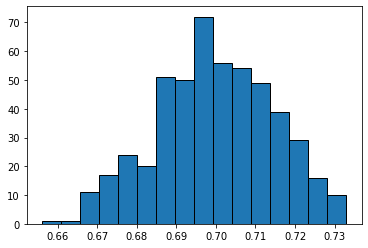

In [ ]:
counts, _, _ = plt.hist(frequency_array, bins='auto',
                        edgecolor='black')

print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


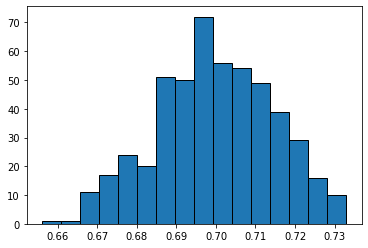

In [ ]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
                                edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [ ]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
           f"{count} element{'' if count == 1 else 's'}"))

output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [ ]:
assert counts[counts.argmax()] == counts.max()

In [ ]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


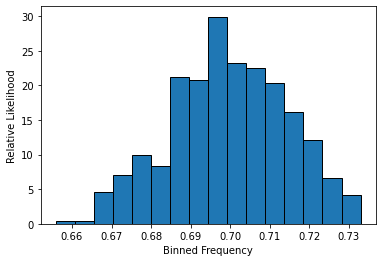

In [ ]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [ ]:
assert likelihoods.sum() * bin_width == 1.0

In [ ]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [ ]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [ ]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
           f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

In [ ]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


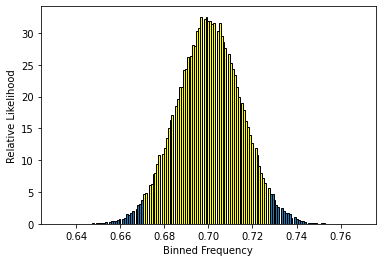

In [ ]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

The frequency range 0.696229 - 0.704518 represents a 96.22% confidence interval


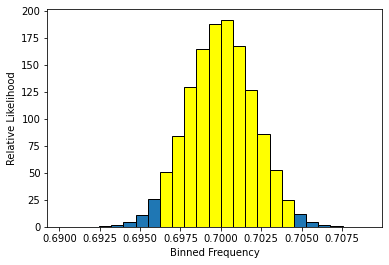

In [ ]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins=25,
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

## Using confidence intervals to analyze a biased deck of cards

In [ ]:
np.random.seed(0)

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

In [ ]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count
weighted_sample_space = {'red_card': red_card_count,
                         'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card',
                                     weighted_sample_space)
red_card_count

44

In [ ]:
assert prob_red == red_card_count / total_cards
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [ ]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


In [ ]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


In [ ]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

The number of red cards in the deck is between 44 and 44
We are correct! There are 44 red cards in the deck


## Using permutations to shuffle cards

Card shuffling requires us to randomly reorder the elements of a card deck. That random reordering can be carried out using the np.random.shuffle method. The function takes as input an ordered array or list and shuffles its elements in place. The following code randomly shuffles a deck of cards containing two red cards (represented by 1s) and two black cards (represented by 0s).

In [ ]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [ ]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


In [ ]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [ ]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [ ]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [ ]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


In [ ]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


**END**